In [1]:
# Preliminaries needed for Python and to run R within a Python notebook
import rpy2.rinterface
%load_ext rpy2.ipython 

## Revisiting the Instagram Example

Last time we performed t-tests to compare the average session duration in each group and we found that there was a significant difference (in fact, a significant increase) in the average session duration of Condition 1 relative to Condition 2.

However, we performed these tests without formally checking whether the underlying assumptions were satisfied. Here we will illustrate how to use F-tests to check whether the equal variance assumption is valid, and how to use Welch's t-test if the variances should not be assumed equal.

## First in R:

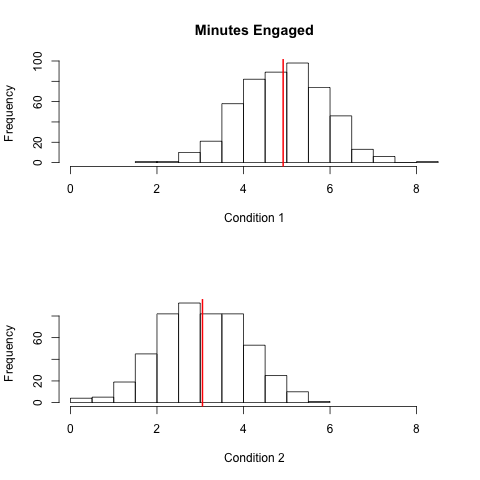

In [2]:
%%R
## Change working directory
setwd(dir = "/Users/ntstevens/Dropbox/Data Institute/DOE Certificate/Week 3/")

## Read in the data
data <- read.csv(file = "instagram.csv", header = T)
cond1 <- data$Condition_1
cond2 <- data$Condition_2

## Plot the data
par(mfrow=c(2,1))
xmin <- min(min(cond1), min(cond2))
xmax <- max(max(cond1), max(B=cond2))
hist(cond1, xlim = c(xmin, xmax), main = "Minutes Engaged", xlab = "Condition 1")
abline(v = mean(cond1), col = "red", lwd = 2)
hist(cond2, xlim = c(xmin, xmax), main = "", xlab = "Condition 2")
abline(v = mean(cond2), col = "red", lwd = 2)

With an F-test let's formally test
$$H_0: \sigma^2_1 = \sigma^2_2 \text{ vs. } H_A: \sigma^2_1 \neq \sigma^2_2$$

In [4]:
%%R
var.test(x = cond1, y = cond2)


	F test to compare two variances

data:  cond1 and cond2
F = 0.9376, num df = 499, denom df = 499, p-value = 0.472
alternative hypothesis: true ratio of variances is not equal to 1
95 percent confidence interval:
 0.7865429 1.1176781
sample estimates:
ratio of variances 
         0.9376042 



This p-value is very large, and so we do not reject the null hypothesis meaning that the equal variance assumption is fine. As such, the Student's t-test that we performed last time was valid.

However, for purposes of illustration let's imagine that we rejected $H_0$ and had to perform Welch's t-test. Below is the code for each of the three possible hypotheses that could be tested. Note that the code is very similar to what was used before expect that we set `var.equal = FALSE`.

$$H_0: \mu_1 = \mu_2 \text{ vs. } H_A: \mu_1 \neq \mu_2$$

In [7]:
%%R
t.test(x = cond1, y = cond2, alternative = "two.sided", var.equal = FALSE)


	Welch Two Sample t-test

data:  cond1 and cond2
t = 30.101, df = 996.97, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 1.742853 1.985939
sample estimates:
mean of x mean of y 
 4.916201  3.051804 



$$H_0: \mu_1 \leq \mu_2 \text{ vs. } H_A: \mu_1 > \mu_2$$

In [8]:
%%R
t.test(x = cond1, y = cond2, alternative = "greater", var.equal = FALSE)


	Welch Two Sample t-test

data:  cond1 and cond2
t = 30.101, df = 996.97, p-value < 2.2e-16
alternative hypothesis: true difference in means is greater than 0
95 percent confidence interval:
 1.762423      Inf
sample estimates:
mean of x mean of y 
 4.916201  3.051804 



$$H_0: \mu_1 \geq \mu_2 \text{ vs. } H_A: \mu_1 < \mu_2$$

In [10]:
%%R
t.test(x = cond1, y = cond2, alternative = "less", var.equal = FALSE)


	Welch Two Sample t-test

data:  cond1 and cond2
t = 30.101, df = 996.97, p-value = 1
alternative hypothesis: true difference in means is less than 0
95 percent confidence interval:
     -Inf 1.966369
sample estimates:
mean of x mean of y 
 4.916201  3.051804 



## In Python:

Text(0,0.5,'Frequency')

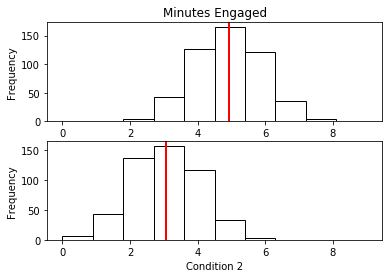

In [11]:
## Import necessary packages
import os
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import scipy.stats as sp

## Change working directory
os.chdir("/Users/ntstevens/Dropbox/Data Institute/DOE Certificate/Week 3")

## Read in the data
data = pd.read_csv('instagram.csv')
cond1 = data["Condition_1"]
cond2 = data["Condition_2"]

## Plot the data
plt.subplot(2,1,1)
x_lo = np.floor(np.min([np.min(cond1), np.min(cond2)]))
x_hi = np.ceil(np.max([np.max(cond1), np.max(cond2)]))
plt.hist(cond1, range = [x_lo, x_hi], color = "white", edgecolor = "black")
plt.axvline(x= np.mean(cond1), color = "red", linewidth = 2)
plt.title("Minutes Engaged")
plt.xlabel("Condition 1")
plt.ylabel("Frequency")
plt.subplot(2,1,2)
plt.hist(cond2, range = [x_lo, x_hi], color = "white", edgecolor = "black")
plt.axvline(x= np.mean(cond2), color = "red", linewidth = 2)
plt.xlabel("Condition 2")
plt.ylabel("Frequency")

I have not yet been able to find a function that automates the F-test for variances in `scipy`, `statsmodels` or `sklearn`. As such, I will illustrate below how to do this manually.

First we will calculate the test statistics, which is the ratio of sample variances computed in each condition. The p-value is then based entirely on this value and the F distribution with $n_{1}-1$ and $n_{2}-1$ degrees of freedom.

In [20]:
## Calculate test statistic
n1 = np.size(cond1)
n2 = np.size(cond2)
t = (n1*np.var(cond1)/(n1-1)) / (n2*np.var(cond2)/(n2-1))
print("test statistic =", t)

test statistic = 0.9376042331476527


$$H_0: \sigma^2_1 = \sigma^2_2 \text{ vs. } H_A: \sigma^2_1 \neq \sigma^2_2$$

In [21]:
p_val = (1-sp.f.cdf(1/t, dfn = n1-1, dfd = n2-1)) + sp.f.cdf(t, dfn = n1-1, dfd = n2-1)
print("p-value =", p_val)

p-value = 0.472032265196


This yields the same p-value as we found in R using the `var.test()` function.

Now for the Welch's tests. Here we simply set `equal_var = False` in the `ttest_ind()` function. Recall that this function only calculates the p-value associated with the two sided test. Thus, we must start there and calculate one-sided p-values accordingly if those tests are of interest.

In [24]:
t, p = sp.ttest_ind(cond1, cond2, equal_var = False)
print(t)
print(p)

30.1012820204
4.0159625287e-142


$$H_0: \mu_1 = \mu_2 \text{ vs. } H_A: \mu_1 \neq \mu_2$$

In [25]:
print("p-value =", p)

p-value = 4.0159625287e-142


$$H_0: \mu_1 \leq \mu_2 \text{ vs. } H_A: \mu_1 > \mu_2$$

In [26]:
print("p-value =", p/2)

p-value = 2.00798126435e-142


$$H_0: \mu_1 \geq \mu_2 \text{ vs. } H_A: \mu_1 < \mu_2$$

In [27]:
print("p-value =", 1-p/2)

p-value = 1.0
